In [232]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.models as models
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import numpy as np

In [233]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Current device: {device}')

Current device: cuda


In [234]:
def calculate_accuracy(model,data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        images, labels = next(iter(data_loader))
        features = resnet_features(images)
        features = features.view(features.size(0), -1)
        model.eval()
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)  # 获取每个样本的预测类别
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

In [235]:
# 定义数据变换（预处理）
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.ToTensor(),         # 将图像转换为张量
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # 归一化
])

# 加载训练数据集
train_dataset = ImageFolder(root='./BreakHis/train', transform=transform)
test_dataset = ImageFolder(root='./BreakHis/test', transform=transform)

test_batch_size = len(test_dataset)
test_all_loader = torch.utils.data.DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [236]:
# 加载预训练的ResNet-18模型
resnet_model = models.resnet18(weights=True)

# 移除最后一层全连接层
resnet_features = nn.Sequential(*list(resnet_model.children())[:-1])

# 设置模型为评估模式
resnet_features.eval()

classifier = nn.Sequential(
    nn.Linear(512, 256),  # 输入维度为ResNet-18的输出维度（512）
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 2)  # 二分类任务，输出2个类别
)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0.001)
## optimizer = optim.SGD(classifier.parameters(), lr=0.001, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)


epoch_list = []
loss_list = []
test_score_list = []
# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    images, labels = next(iter(train_loader))
    features = resnet_features(images)
    features = features.view(features.size(0), -1)
    outputs = classifier(features)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    classifier.eval()
    test_accuracy = calculate_accuracy(classifier,test_loader)
    classifier.train()
    epoch_list.append(epoch+1)
    loss_list.append(loss.item())
    test_score_list.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

print('Finished Training')

c:\Users\dianp\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/100], Loss: 0.6691434383392334
Epoch [2/100], Loss: 0.8775759935379028
Epoch [3/100], Loss: 0.5139065384864807
Epoch [4/100], Loss: 0.5037667751312256
Epoch [5/100], Loss: 0.4443676173686981
Epoch [6/100], Loss: 0.38795822858810425
Epoch [7/100], Loss: 0.6320777535438538
Epoch [8/100], Loss: 0.564805269241333
Epoch [9/100], Loss: 0.35816025733947754
Epoch [10/100], Loss: 0.40261751413345337
Epoch [11/100], Loss: 0.4724164307117462
Epoch [12/100], Loss: 0.5349025130271912
Epoch [13/100], Loss: 0.309994101524353
Epoch [14/100], Loss: 0.3878006935119629
Epoch [15/100], Loss: 0.4686240553855896
Epoch [16/100], Loss: 0.4016490578651428
Epoch [17/100], Loss: 0.34963181614875793
Epoch [18/100], Loss: 0.3378022611141205
Epoch [19/100], Loss: 0.3875018358230591
Epoch [20/100], Loss: 0.5207090973854065
Epoch [21/100], Loss: 0.43978551030158997
Epoch [22/100], Loss: 0.47452545166015625
Epoch [23/100], Loss: 0.3966885507106781
Epoch [24/100], Loss: 0.36241763830184937
Epoch [25/100], Loss

In [237]:
print(epoch_list)
print(test_score_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[71.875, 68.75, 81.25, 71.875, 62.5, 81.25, 78.125, 84.375, 71.875, 65.625, 81.25, 84.375, 78.125, 71.875, 84.375, 81.25, 71.875, 93.75, 90.625, 93.75, 87.5, 65.625, 81.25, 84.375, 84.375, 75.0, 75.0, 87.5, 78.125, 90.625, 81.25, 78.125, 84.375, 75.0, 84.375, 90.625, 81.25, 87.5, 90.625, 78.125, 84.375, 84.375, 81.25, 84.375, 81.25, 78.125, 100.0, 93.75, 90.625, 90.625, 78.125, 78.125, 81.25, 84.375, 84.375, 93.75, 84.375, 90.625, 75.0, 71.875, 81.25, 90.625, 78.125, 90.625, 90.625, 75.0, 87.5, 96.875, 96.875, 84.375, 90.625, 96.875, 78.125, 81.25, 90.625, 93.75, 87.5, 87.5, 84.375, 90.625, 87.5, 96.

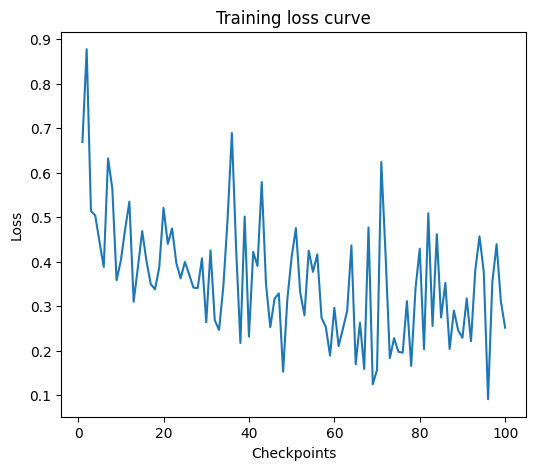

In [238]:
# loss curve visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.plot(epoch_list,loss_list)
plt.xlabel("Checkpoints")
plt.ylabel("Loss")
plt.title("Training loss curve")
plt.show()

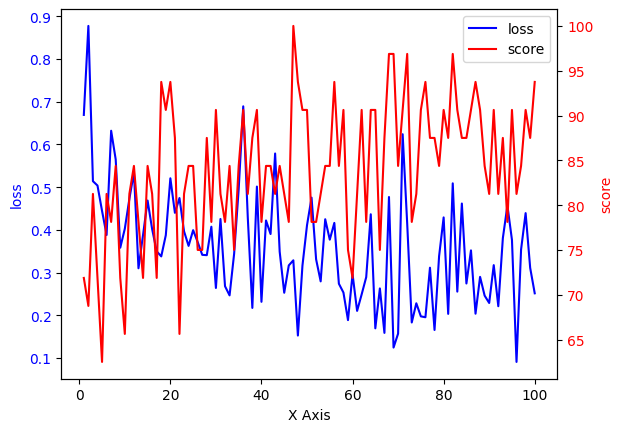

In [239]:
fig, ax1 = plt.subplots()

# 绘制第一个数据和设置标签
ax1.plot(epoch_list, loss_list, label='loss', color='b')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('loss', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个坐标轴并绘制数据
ax2 = ax1.twinx()
ax2.plot(epoch_list, test_score_list, label='score', color='r')
ax2.set_ylabel('score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

# 显示图形
plt.show()

In [243]:

classifier.eval()
score_sum = 0
count = 0
for epoch in range(1):
    count = count + 1
    test_accuracy = calculate_accuracy(classifier.to('cpu'), test_all_loader)
    score_sum = test_accuracy + score_sum

print(f'score: {score_sum/count}')



score: 89.35779816513761
